Learning Rate 0.01: Intercept=152.133, Slope=45.160
MSE=3890.457

Learning Rate 0.05: Intercept=152.133, Slope=45.160
MSE=3890.457

Learning Rate 0.1: Intercept=152.133, Slope=45.160
MSE=3890.457



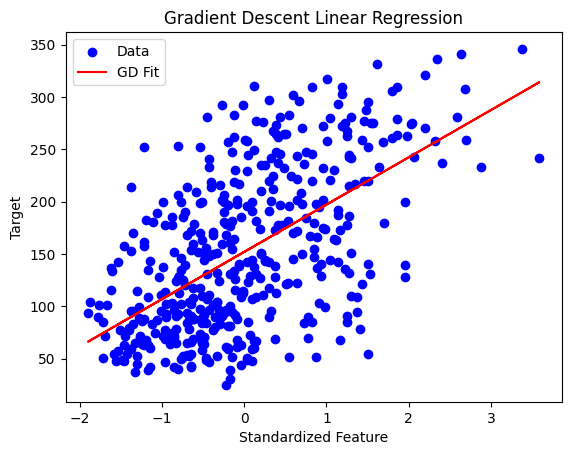

Linear Regression MSE (nonlinear data): 312.155
Coefficients: [ 0.         46.82657271  0.24487212  0.16482786]

Lasso Regression MSE: 312.183
Lasso Coefficients: [ 0.         46.63036791  0.14381519  0.18088607]

Ridge Regression MSE: 312.943
Ridge Coefficients: [ 0.         45.06427529  0.53897256  0.71301903]


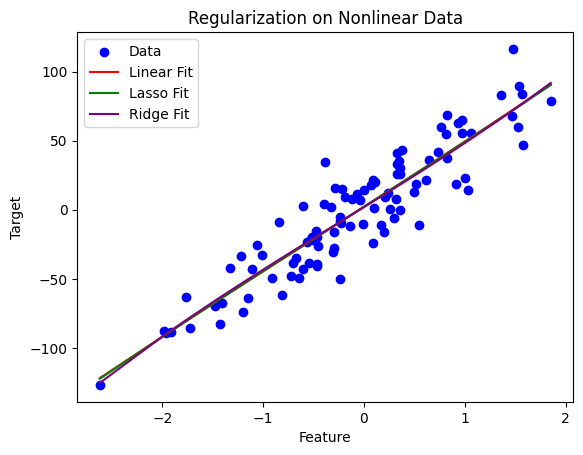

In [2]:
# IMPORTS-
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, make_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

# 1️ GRADIENT DESCENT LINEAR REGRESSION
# Load sample regression dataset (diabetes)
X, y = load_diabetes(return_X_y=True)
X = X[:, np.newaxis, 2]  # select one feature to mimic house price vs one variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Gradient Descent Function
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(epochs):
        gradients = (2/m) * X.T @ (X @ theta - y)
        theta -= lr * gradients
    return theta

# Try different learning rates
learning_rates = [0.01, 0.05, 0.1]
epochs = 1000

for lr in learning_rates:
    theta = gradient_descent(X_b, y, lr=lr, epochs=epochs)
    print(f"Learning Rate {lr}: Intercept={theta[0]:.3f}, Slope={theta[1]:.3f}")

    # Predictions
    y_pred = X_b @ theta
    mse = mean_squared_error(y, y_pred)
    print(f"MSE={mse:.3f}\n")

# Plot final GD result
plt.scatter(X_scaled, y, color='blue', label='Data')
plt.plot(X_scaled, X_b @ theta, color='red', label='GD Fit')
plt.xlabel("Standardized Feature")
plt.ylabel("Target")
plt.title("Gradient Descent Linear Regression")
plt.legend()
plt.show()


# 2️ LASSO & RIDGE REGULARIZATION ON NONLINEAR DATA
# Generate nonlinear regression data
X_poly, y_poly = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
poly = PolynomialFeatures(degree=3)
X_poly_features = poly.fit_transform(X_poly)

# Split into train-test (optional here using full data)
# Standard Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly_features, y_poly)
y_pred_lin = lin_reg.predict(X_poly_features)
mse_lin = mean_squared_error(y_poly, y_pred_lin)
print(f"Linear Regression MSE (nonlinear data): {mse_lin:.3f}")
print("Coefficients:", lin_reg.coef_)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly_features, y_poly)
y_pred_lasso = lasso.predict(X_poly_features)
mse_lasso = mean_squared_error(y_poly, y_pred_lasso)
print(f"\nLasso Regression MSE: {mse_lasso:.3f}")
print("Lasso Coefficients:", lasso.coef_)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly_features, y_poly)
y_pred_ridge = ridge.predict(X_poly_features)
mse_ridge = mean_squared_error(y_poly, y_pred_ridge)
print(f"\nRidge Regression MSE: {mse_ridge:.3f}")
print("Ridge Coefficients:", ridge.coef_)

# Plot all models
plt.scatter(X_poly, y_poly, color='blue', label='Data')
plt.plot(np.sort(X_poly[:,0]), y_pred_lin[np.argsort(X_poly[:,0])], color='red', label='Linear Fit')
plt.plot(np.sort(X_poly[:,0]), y_pred_lasso[np.argsort(X_poly[:,0])], color='green', label='Lasso Fit')
plt.plot(np.sort(X_poly[:,0]), y_pred_ridge[np.argsort(X_poly[:,0])], color='purple', label='Ridge Fit')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Regularization on Nonlinear Data")
plt.legend()
plt.show()
